# Global Power Plant Project

In [437]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw


# Import Dataset

In [438]:
df=pd.read_csv("globalpower.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [439]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [440]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [441]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
352,IND,India,KOLAGHAT,IND0000203,1260.0,22.4157,87.8713,Coal,Oil,NaN,...,2019.0,NaN,6449.7610,5124.74137,5382.524000,4208.389,3926.2720,NaN,Central Electricity Authority,NaN
92,IND,India,BHIVPURI,IND0000057,75.0,18.9368,73.4527,Hydro,NaN,NaN,...,2019.0,NaN,299.1766,195.93540,205.557050,305.664,314.3205,NaN,Central Electricity Authority,NaN
542,IND,India,NMDC Anehalu Wind Farm,WRI1026349,10.5,14.0980,76.3154,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,IND,India,SAMAYANALLUR DG,IND0000390,106.0,9.9751,78.0445,Oil,NaN,NaN,...,2019.0,NaN,243.6340,39.95400,11.308044,NaN,0.0000,NaN,Central Electricity Authority,NaN
642,IND,India,RAS CEMENT PLANT,WRI1019898,36.0,26.2630,74.1878,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [442]:
df.shape

(907, 27)

In [443]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [445]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<Axes: >

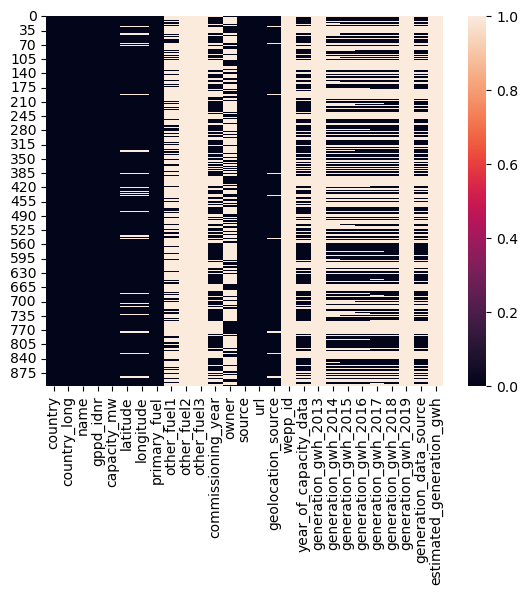

In [446]:
sns.heatmap(df.isnull())

In [447]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


In [448]:
# remove empty columns and non relevalent columns.
df.drop(columns=["country","country_long",'url','year_of_capacity_data','gppd_idnr','owner','other_fuel1','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id','name','generation_data_source'],axis=1,inplace=True)

In [449]:
df.sample(3)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
791,220.0,12.9019,74.8160,Gas,2001.0,Central Electricity Authority,WRI,NaN,0.0,0.0,0.0,0.0,0.0,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,45.5,23.4469,75.4080,Coal,NaN,Grasim Industries ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
# Filling the value in columns
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [451]:
df.fillna(df.median()[0], inplace=True)

In [452]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [453]:
df.sample(3)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
235,540.0,31.3841,75.1464,Coal,2016.0,Central Electricity Authority,WRI,59.2,59.200000,117.654000,197.872000,1391.922,2211.670,59.2
856,672.0,18.8800,72.9715,Gas,1988.0,Central Electricity Authority,WRI,59.2,3393.009000,2801.530000,3203.300000,3119.863,2505.897,59.2
563,330.5,11.0749,79.8340,Gas,2001.0,Central Electricity Authority,WRI,59.2,1142.965769,152.252966,195.884661,0.000,0.000,59.2


In [454]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<Axes: xlabel='primary_fuel', ylabel='count'>

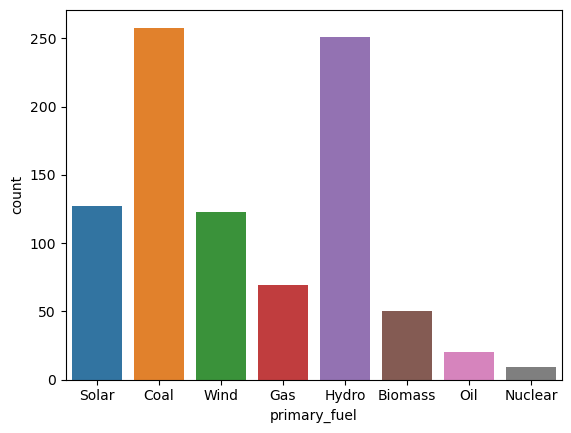

In [455]:
# Countplot of primary_fuel 
sns.countplot(x='primary_fuel',data=df)

In [456]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

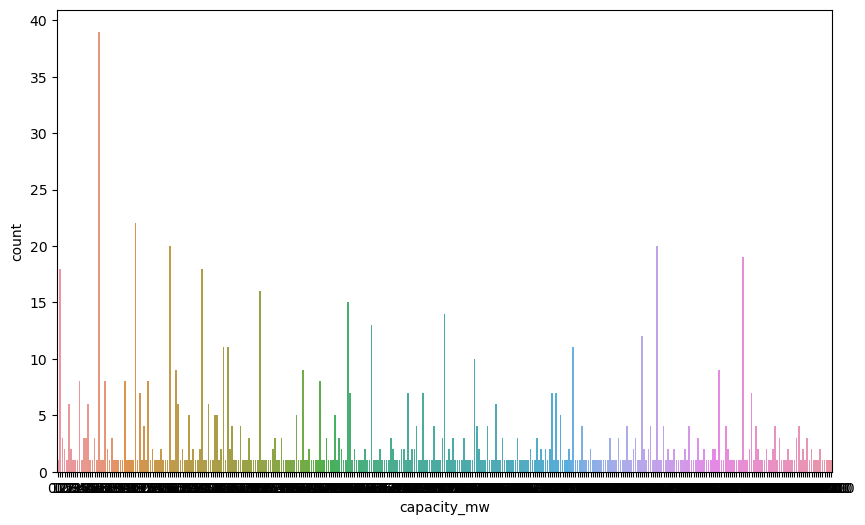

In [457]:
# Countplot of capacity_mw
plt.figure(figsize=(10,6))
sns.countplot(x='capacity_mw',data=df)
plt.show()

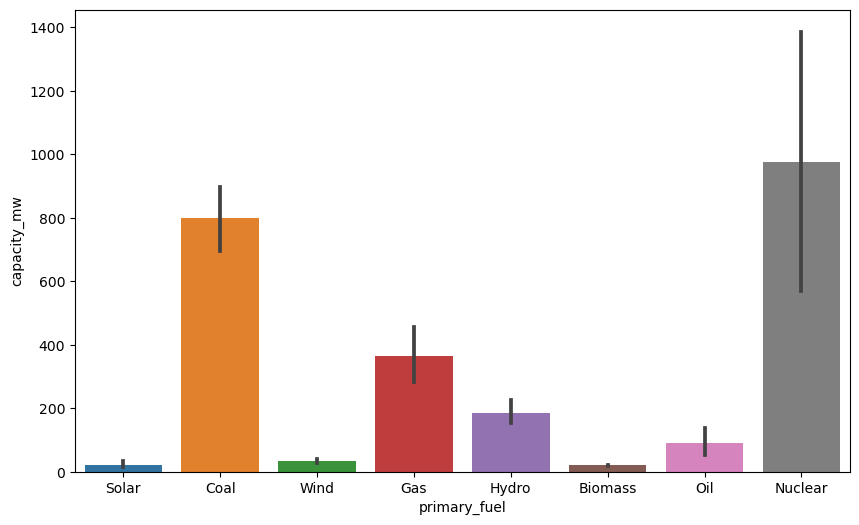

In [458]:
#Lets check the relation between primary_fuel and capacity_mw
plt.figure(figsize=(10,6))
sns.barplot(x="primary_fuel", y="capacity_mw", data=df)
plt.show()

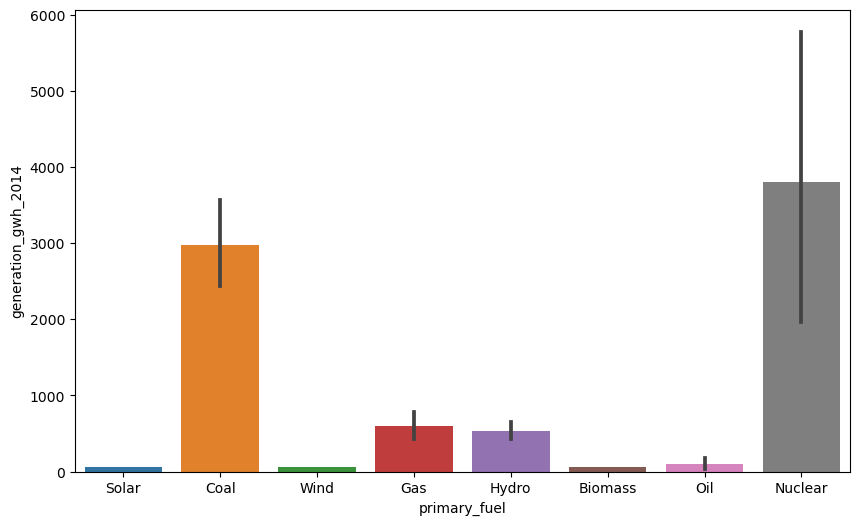

In [459]:
# Checking generation growth in 2014 with primary_fuel
plt.figure(figsize=(10,6))
sns.barplot(x="primary_fuel", y="generation_gwh_2014", data=df)
plt.show()

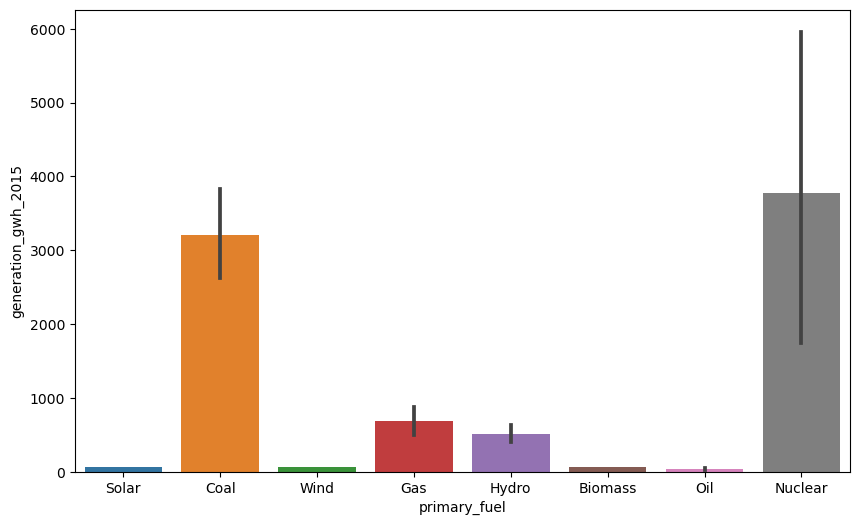

In [460]:
# Checking generation growth in 2015 with primary_fuel
plt.figure(figsize=(10,6))
sns.barplot(x="primary_fuel", y="generation_gwh_2015", data=df)
plt.show()

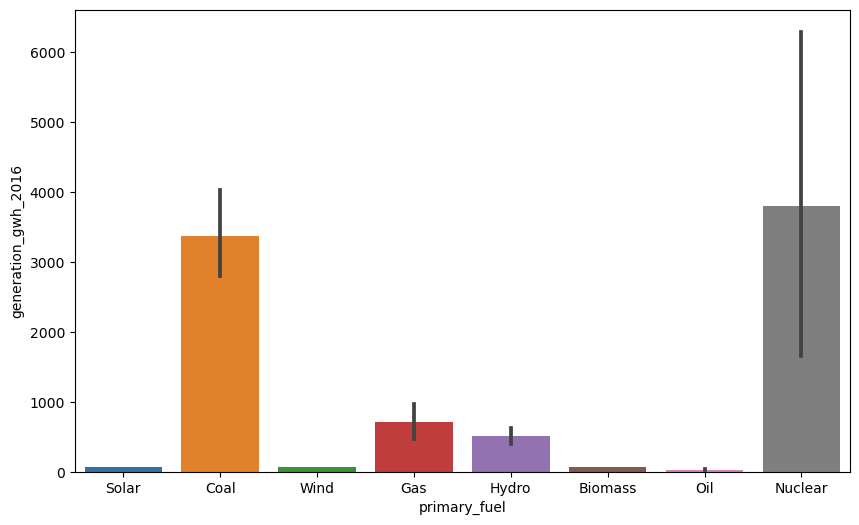

In [461]:
# Checking generation growth in 2016 with primary_fuel
plt.figure(figsize=(10,6))
sns.barplot(x="primary_fuel", y="generation_gwh_2016", data=df)
plt.show()

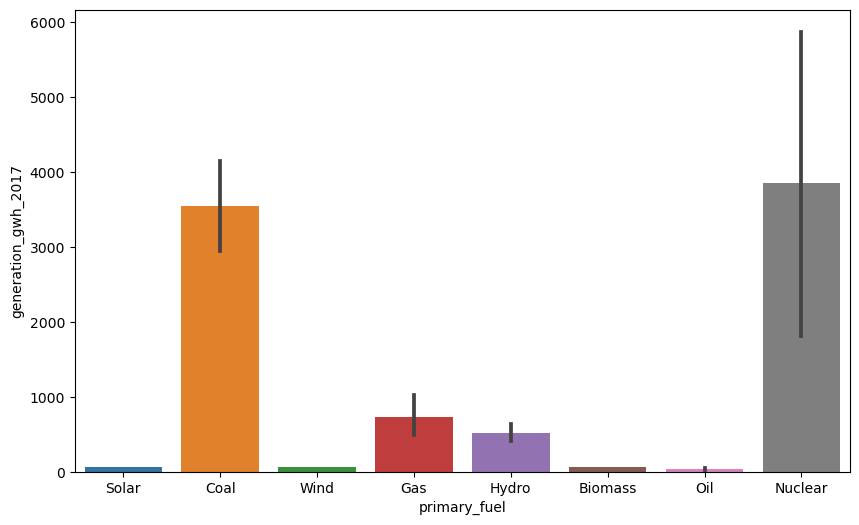

In [462]:
# Checking generation growth in 2017 with primary_fuel
plt.figure(figsize=(10,6))
sns.barplot(x="primary_fuel", y="generation_gwh_2017", data=df)
plt.show()

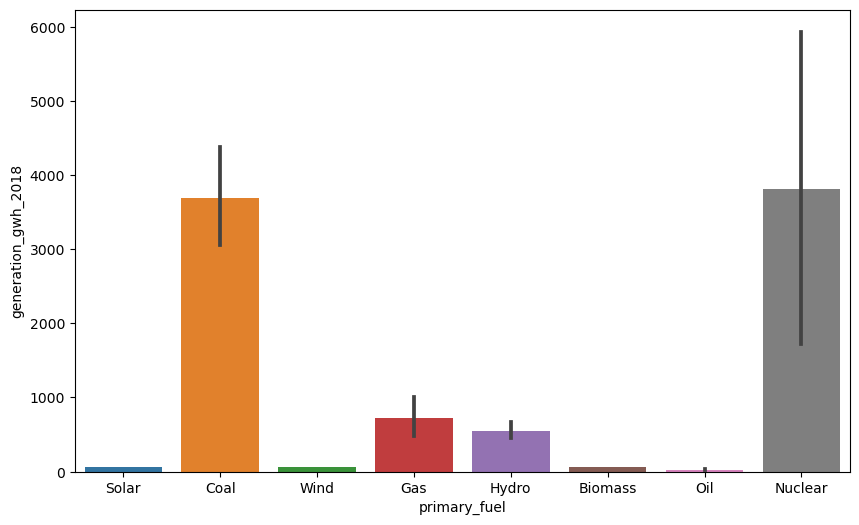

In [463]:
# Checking generation growth in 2018 with primary_fuel
plt.figure(figsize=(10,6))
sns.barplot(x="primary_fuel", y="generation_gwh_2018", data=df)
plt.show()

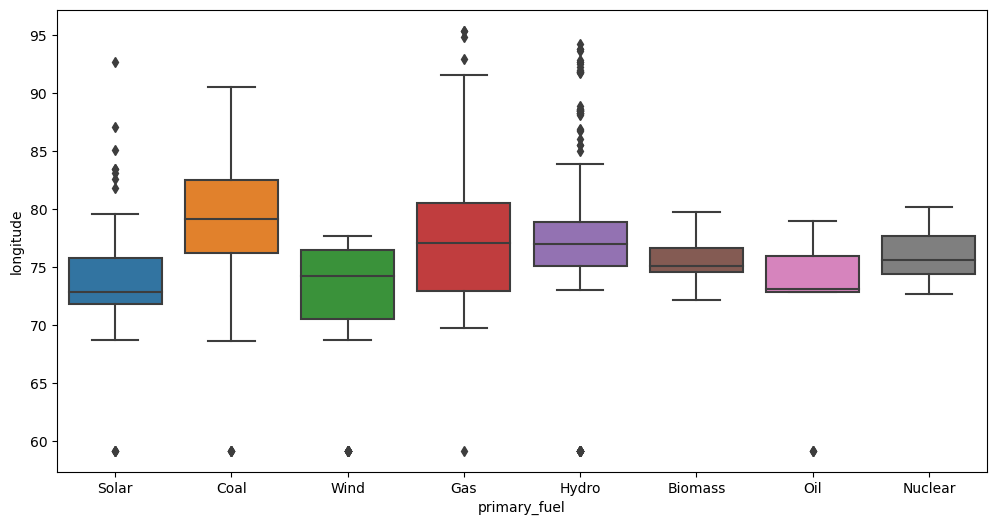

In [464]:
# Comparision between longitude and primary_fuel
plt.figure(figsize=(12,6))
sns.boxplot(x="primary_fuel", y="longitude", data=df)
plt.show()

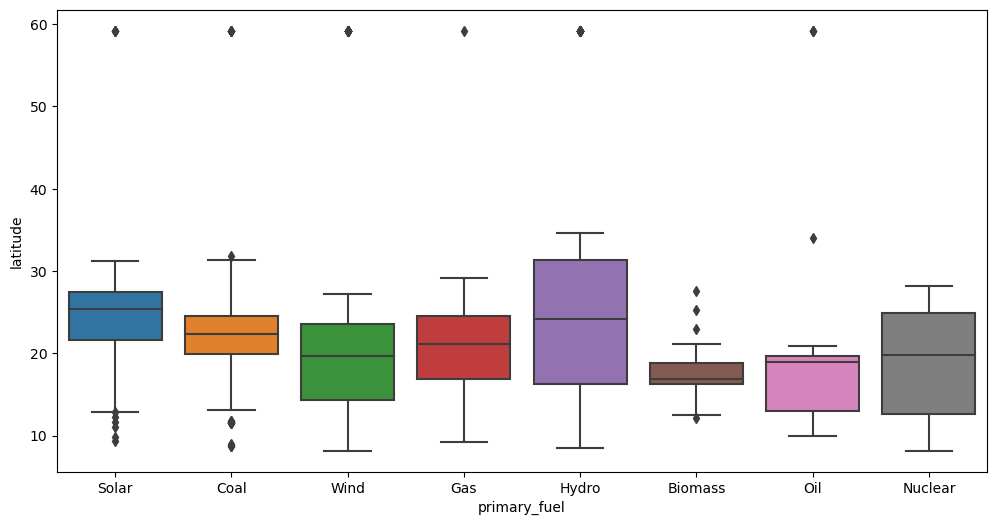

In [465]:
# Comparision between latitude and primary_fuel
plt.figure(figsize=(12,6))
sns.boxplot(x="primary_fuel", y="latitude", data=df)
plt.show()

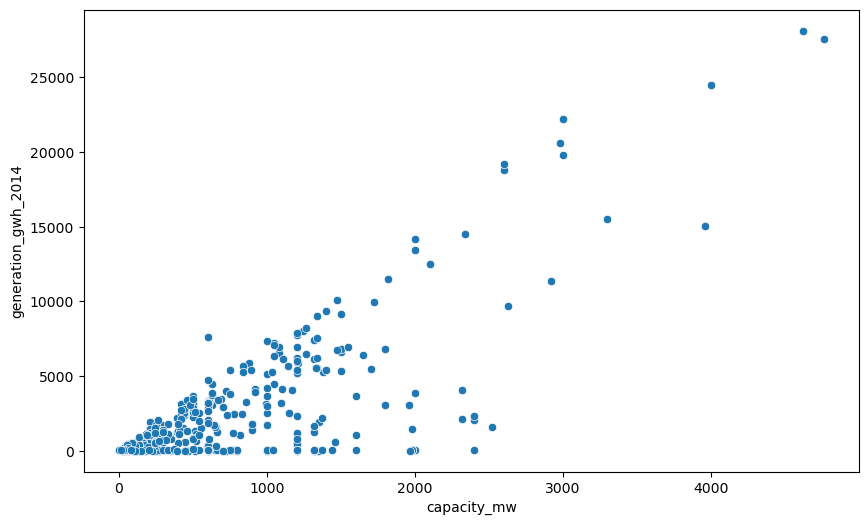

In [466]:
# Checking generation growth in 2014 with capacity_mw
plt.figure(figsize=(10,6))
sns.scatterplot(x="capacity_mw", y="generation_gwh_2014", data=df)
plt.show()

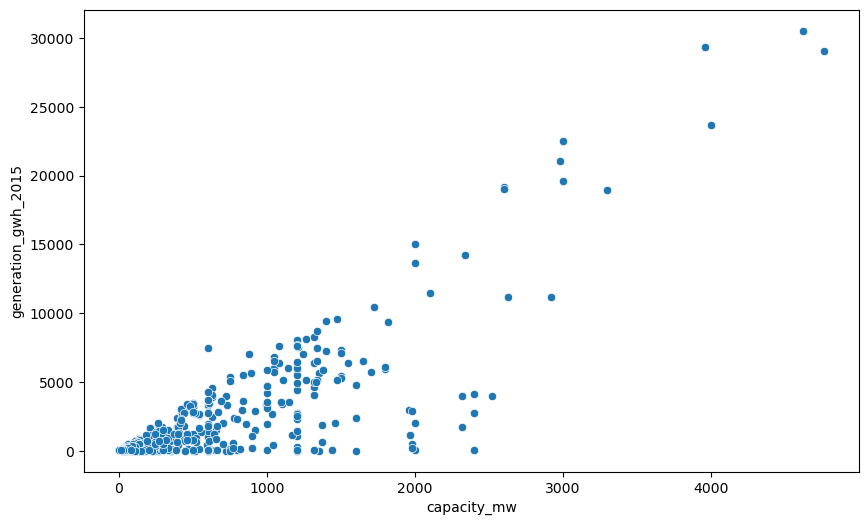

In [467]:
# Checking generation growth in 2015 with capacity_mw
plt.figure(figsize=(10,6))
sns.scatterplot(x="capacity_mw", y="generation_gwh_2015", data=df)
plt.show()

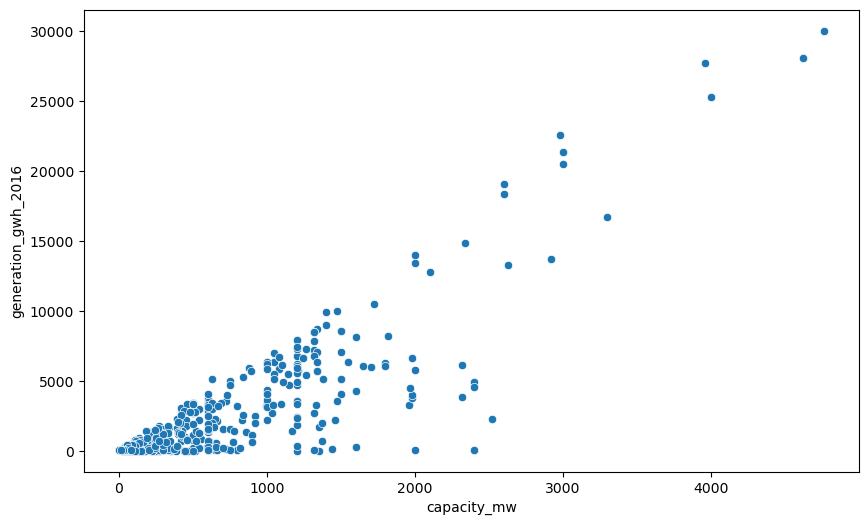

In [468]:
# Checking generation growth in 2016 with capacity_mw
plt.figure(figsize=(10,6))
sns.scatterplot(x="capacity_mw", y="generation_gwh_2016", data=df)
plt.show()

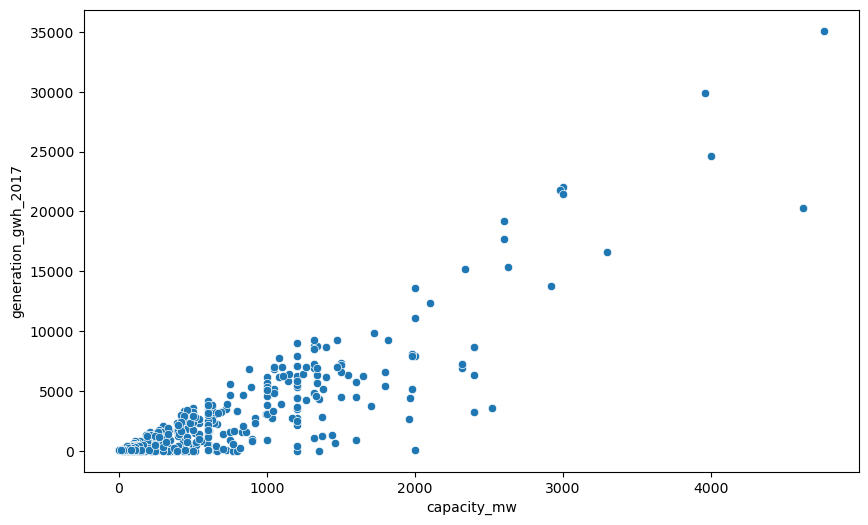

In [469]:
# Checking generation growth in 2017 with capacity_mw
plt.figure(figsize=(10,6))
sns.scatterplot(x="capacity_mw", y="generation_gwh_2017", data=df)
plt.show()

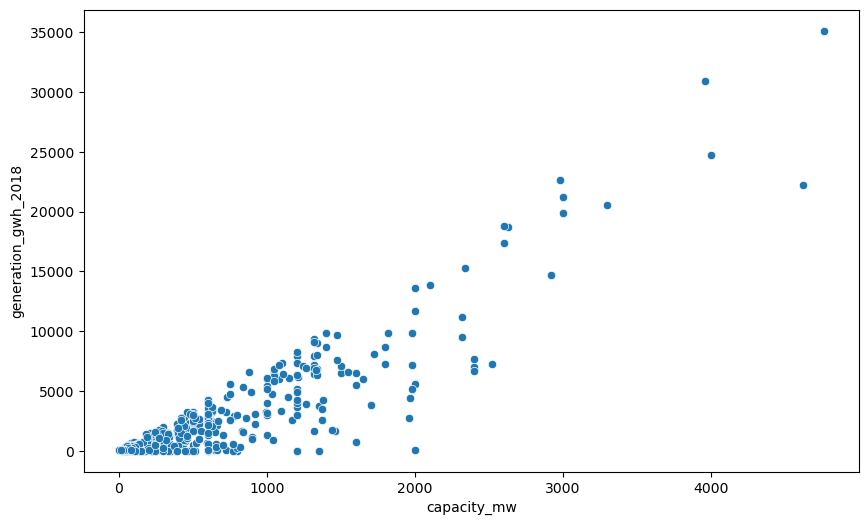

In [470]:
# Checking generation growth in 2018 with capacity_mw
plt.figure(figsize=(10,6))
sns.scatterplot(x="capacity_mw", y="generation_gwh_2018", data=df)
plt.show()

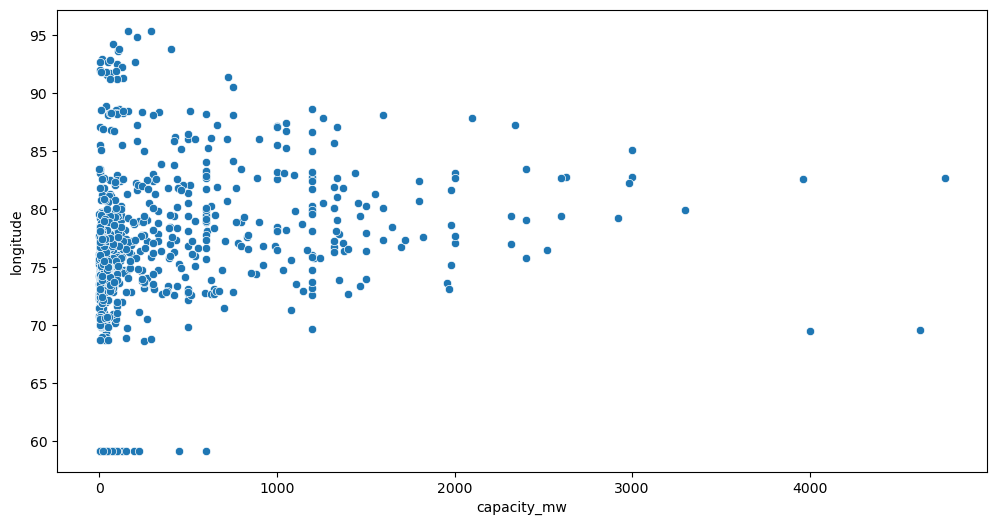

In [471]:
# Comparision between longitude and capacity_mw
plt.figure(figsize=(12,6))
sns.scatterplot(x="capacity_mw", y="longitude", data=df)
plt.show()

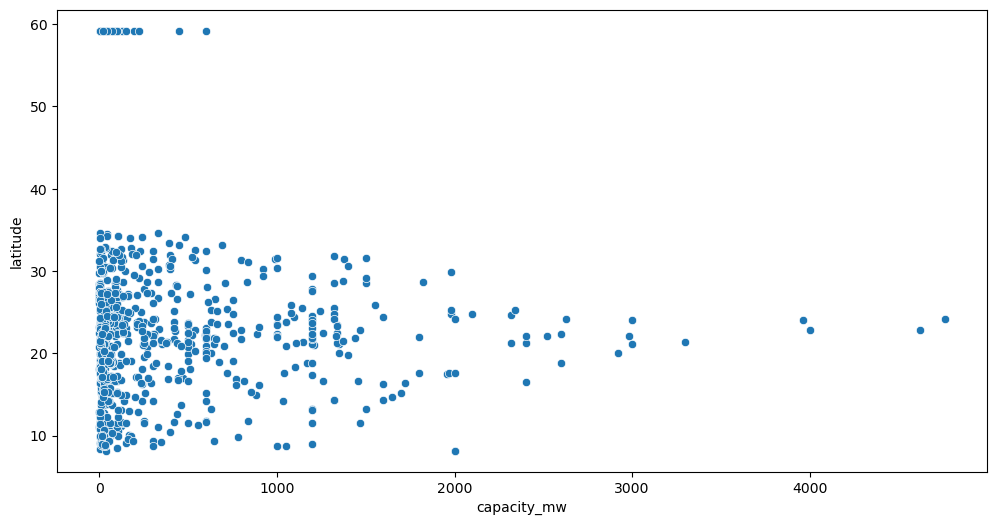

In [472]:
# Comparision between latitude and capacity_mw
plt.figure(figsize=(12,6))
sns.scatterplot(x="capacity_mw", y="latitude", data=df)
plt.show()

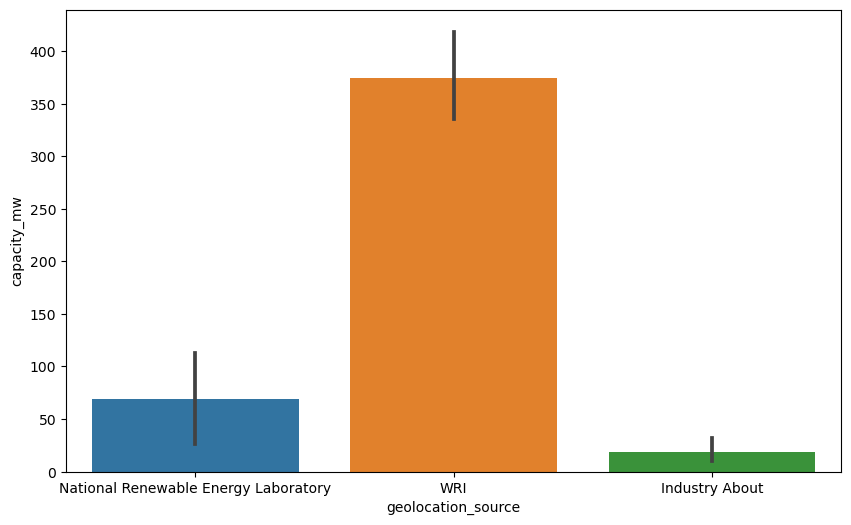

In [473]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

# Distribution of features

In [474]:
newdf=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

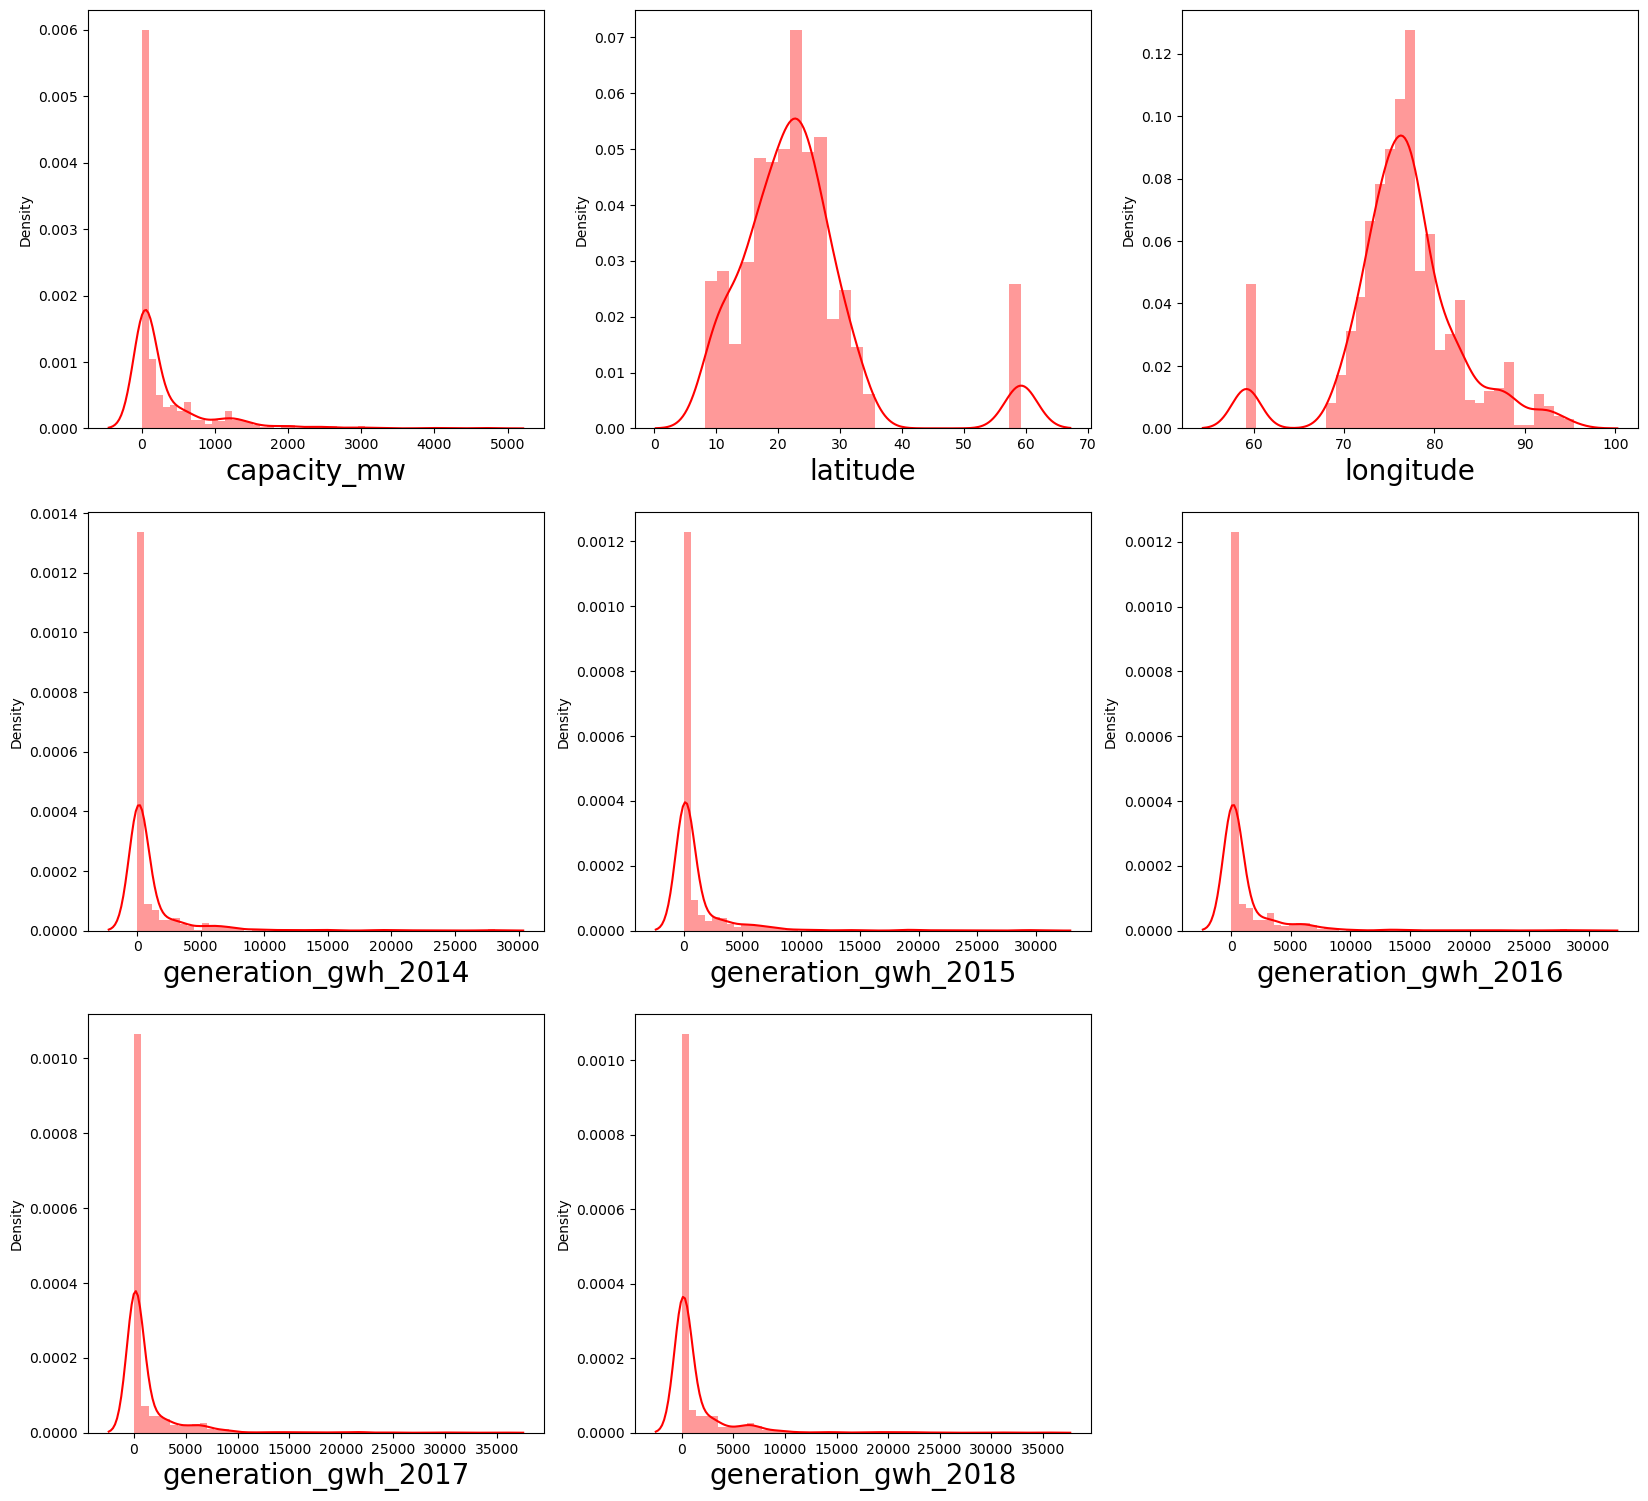

In [475]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in newdf:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

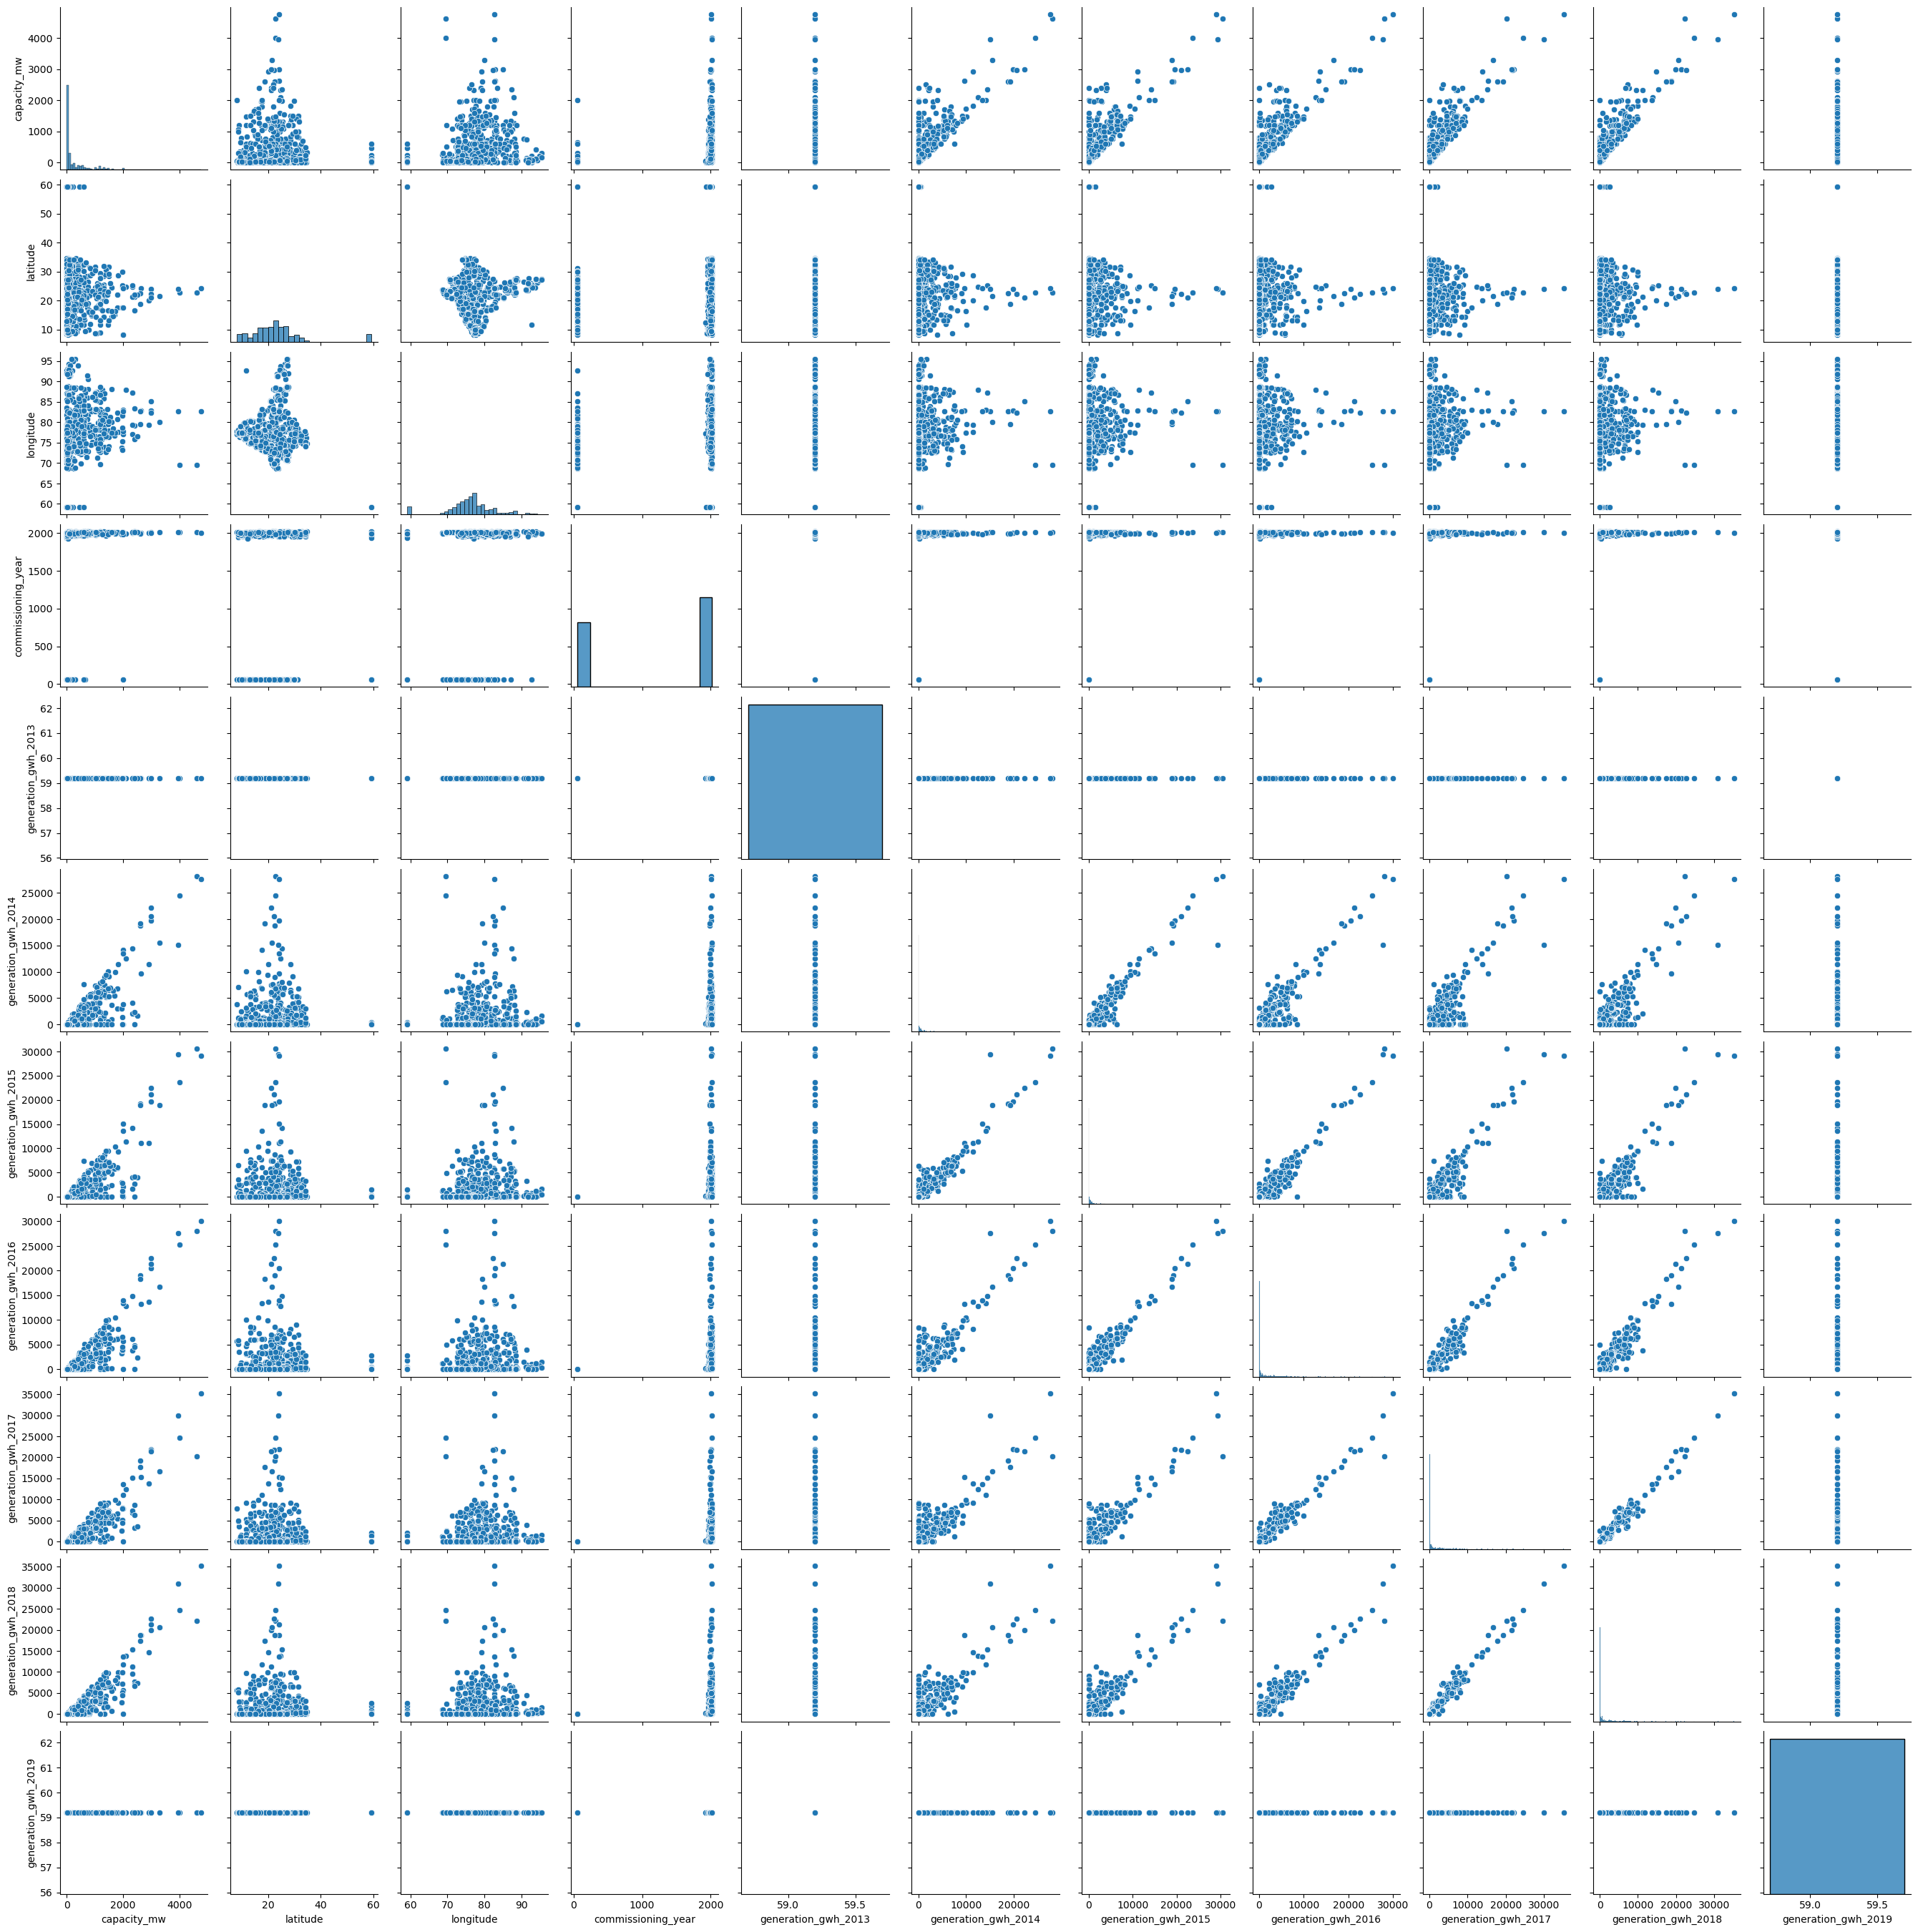

In [476]:
# Pairplot 
sns.pairplot(df)

# Encoding categorical data

In [479]:
Category=['primary_fuel','source','geolocation_source']

In [480]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.sample(3)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
608,1.0,26.5653,75.5622,6,59.2,129,0,59.2,59.2,59.2,59.2,59.2,59.2,59.2
28,50.0,14.9455,77.6870,6,59.2,97,0,59.2,59.2,59.2,59.2,59.2,59.2,59.2
604,65.6,17.2684,73.8368,7,59.2,21,2,59.2,59.2,59.2,59.2,59.2,59.2,59.2


capacity_mw               Axes(0.125,0.825775;0.227941x0.0542254)
latitude               Axes(0.398529,0.825775;0.227941x0.0542254)
longitude              Axes(0.672059,0.825775;0.227941x0.0542254)
primary_fuel              Axes(0.125,0.760704;0.227941x0.0542254)
commissioning_year     Axes(0.398529,0.760704;0.227941x0.0542254)
source                 Axes(0.672059,0.760704;0.227941x0.0542254)
geolocation_source        Axes(0.125,0.695634;0.227941x0.0542254)
generation_gwh_2013    Axes(0.398529,0.695634;0.227941x0.0542254)
generation_gwh_2014    Axes(0.672059,0.695634;0.227941x0.0542254)
generation_gwh_2015       Axes(0.125,0.630563;0.227941x0.0542254)
generation_gwh_2016    Axes(0.398529,0.630563;0.227941x0.0542254)
generation_gwh_2017    Axes(0.672059,0.630563;0.227941x0.0542254)
generation_gwh_2018       Axes(0.125,0.565493;0.227941x0.0542254)
generation_gwh_2019    Axes(0.398529,0.565493;0.227941x0.0542254)
dtype: object

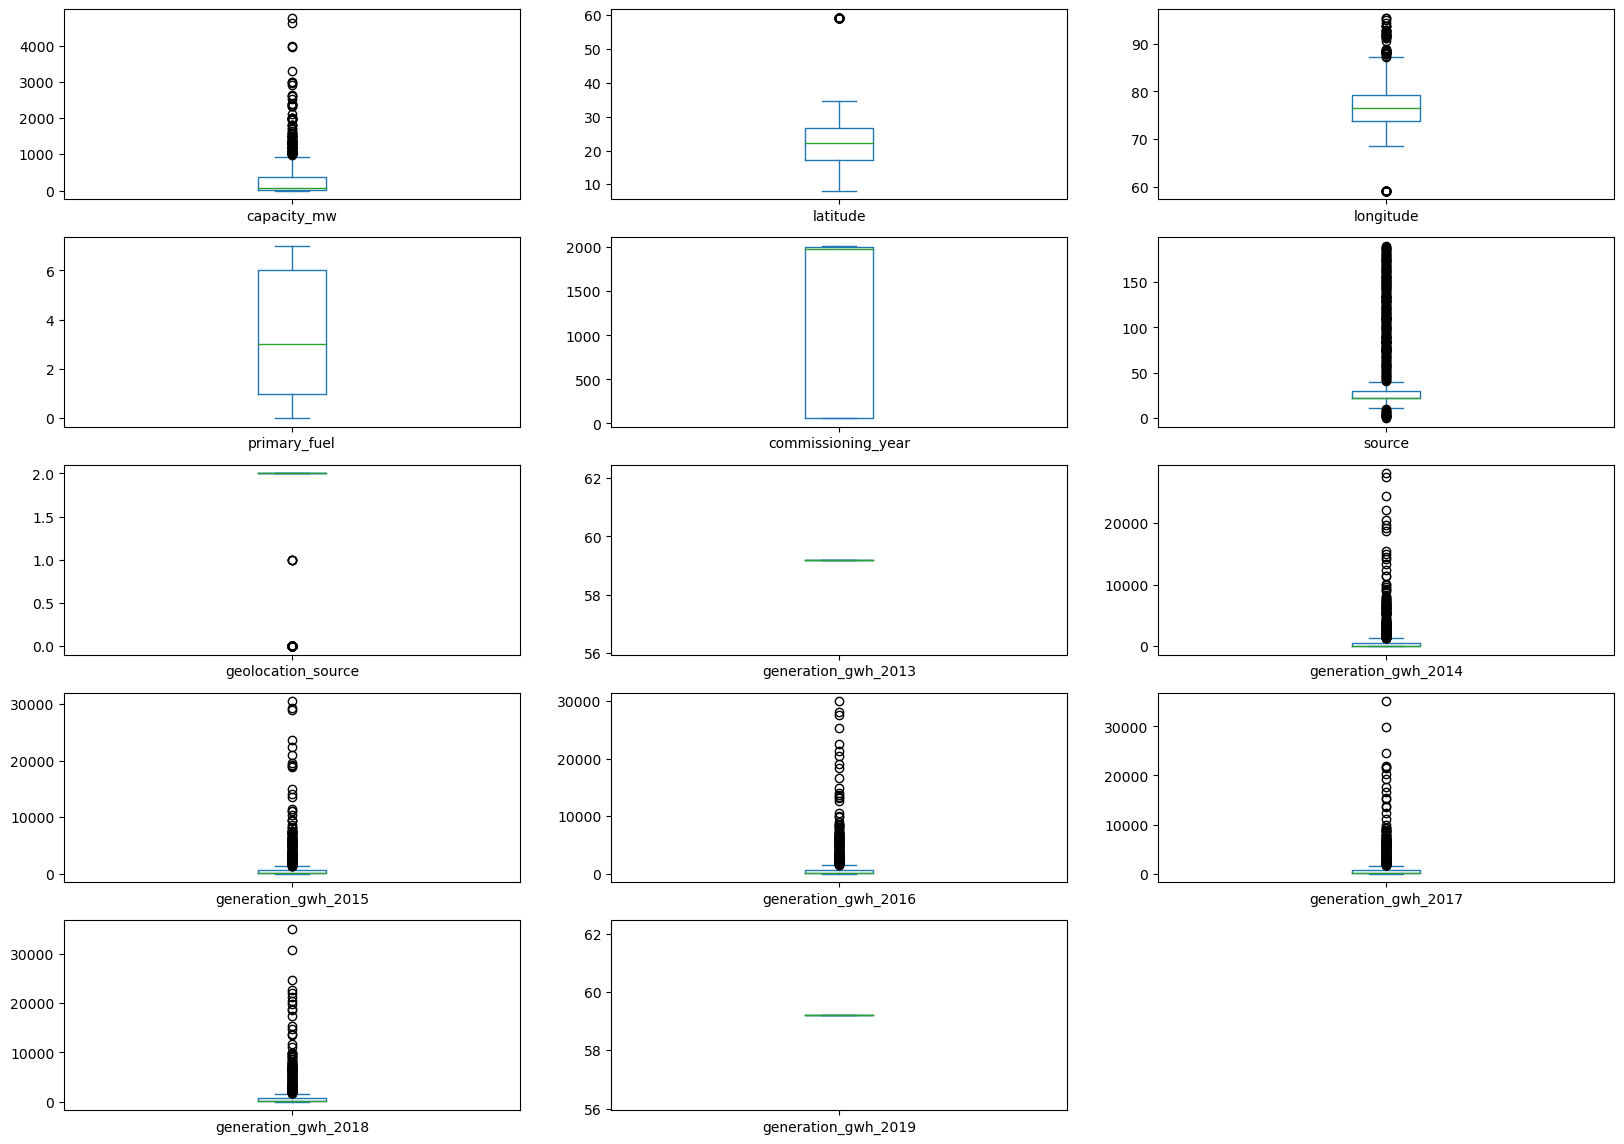

In [481]:
df.plot(kind='box',subplots=True ,layout=(12,3) ,figsize=(20,35))

In [482]:
# Removing Outliers using Z score Method
from scipy.stats import zscore
z=np.abs(zscore(df[['longitude','source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]))
z

,longitude,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.526774,1.460215,0.357473,0.356430,0.369673,0.380384,0.382173
1,0.308213,2.917019,0.357473,0.356430,0.369673,0.380384,0.382173
2,1.144536,0.512075,0.357473,0.356430,0.369673,0.380384,0.382173
3,2.367481,0.489662,0.165681,0.102731,0.104488,0.189891,0.209552
4,0.937708,0.489662,0.664461,1.537600,1.613686,1.297882,1.815722
...,...,...,...,...,...,...,...
902,0.130697,0.489662,0.357473,0.375252,0.313738,0.126362,0.191207
903,0.259856,0.743019,0.357473,0.356430,0.369673,0.380384,0.382173
904,0.152938,0.512075,0.357473,0.356430,0.369673,0.380384,0.382173
905,0.445790,0.339596,0.357473,0.356430,0.369673,0.380384,0.382173


In [483]:
z=np.abs(zscore(df[['longitude','source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]))
threshold=3
df1=df[(z<3).all(axis=1)]

In [484]:
df1.shape

(870, 14)

In [485]:
df=df1.copy()
df.shape

(870, 14)

# Skewness

In [486]:
df.skew()

capacity_mw            2.204268
latitude               1.909293
longitude             -0.339310
primary_fuel           0.438330
commissioning_year    -0.326076
source                 1.842551
geolocation_source    -2.160924
generation_gwh_2013    0.000000
generation_gwh_2014    2.830125
generation_gwh_2015    2.633177
generation_gwh_2016    2.568077
generation_gwh_2017    2.480624
generation_gwh_2018    2.523178
generation_gwh_2019    0.000000
dtype: float64

array([[<Axes: title={'center': 'capacity_mw'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'primary_fuel'}>],
       [<Axes: title={'center': 'commissioning_year'}>,
        <Axes: title={'center': 'source'}>,
        <Axes: title={'center': 'geolocation_source'}>,
        <Axes: title={'center': 'generation_gwh_2013'}>],
       [<Axes: title={'center': 'generation_gwh_2014'}>,
        <Axes: title={'center': 'generation_gwh_2015'}>,
        <Axes: title={'center': 'generation_gwh_2016'}>,
        <Axes: title={'center': 'generation_gwh_2017'}>],
       [<Axes: title={'center': 'generation_gwh_2018'}>,
        <Axes: title={'center': 'generation_gwh_2019'}>, <Axes: >,
        <Axes: >]], dtype=object)

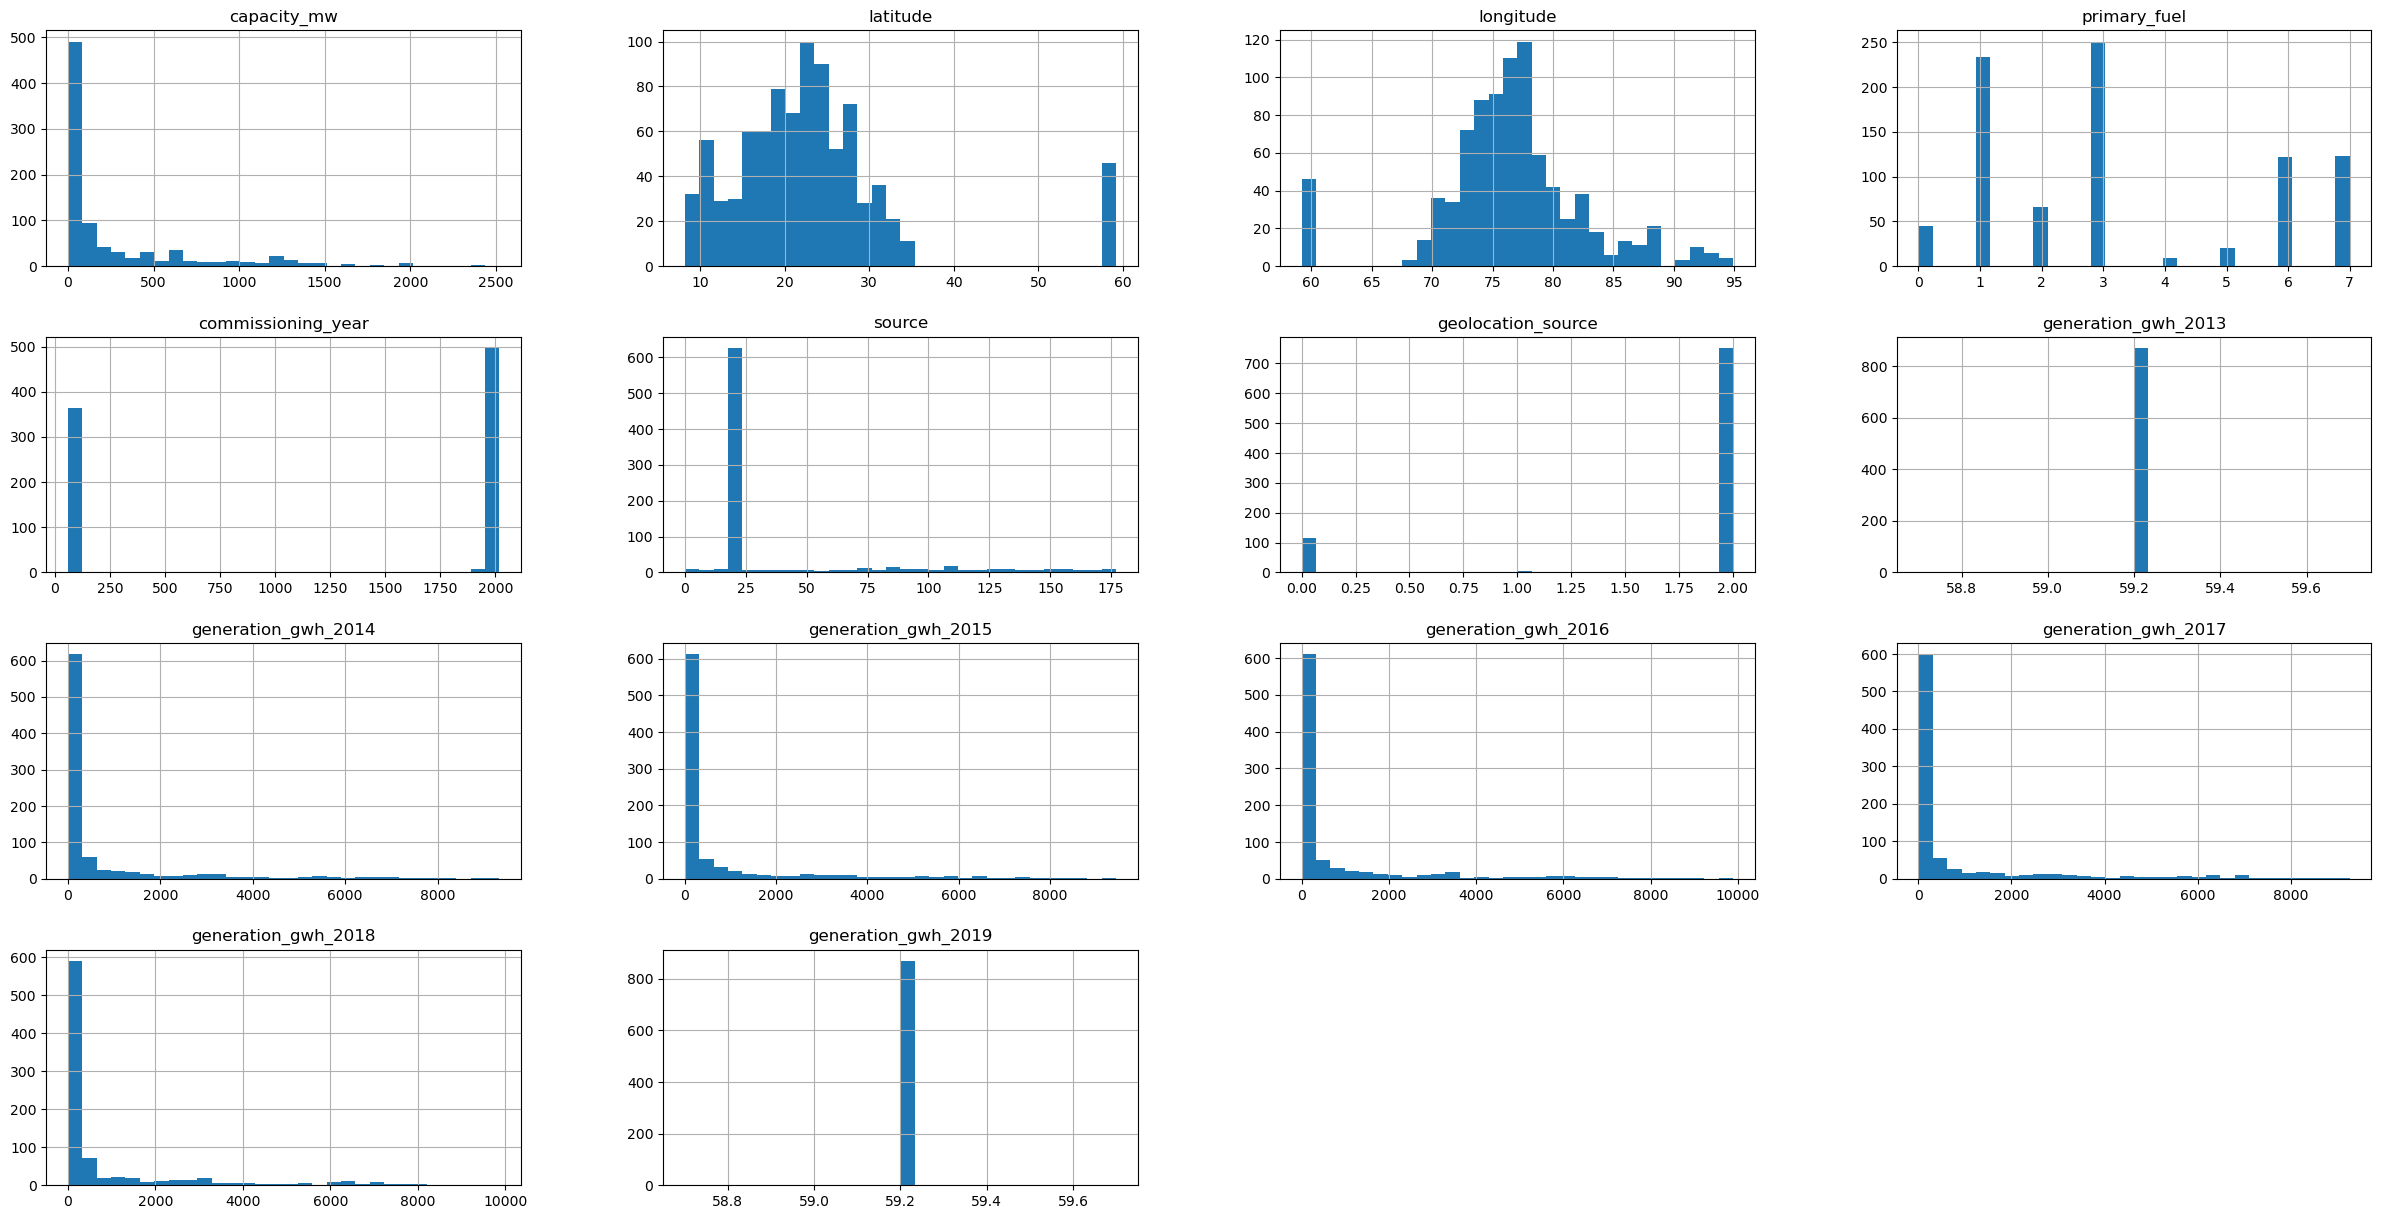

In [487]:
df.hist(bins=30,figsize=(30,15))

In [488]:
# Using logp1 method
for i in df:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [489]:
df.skew()

capacity_mw            0.088054
latitude               0.226894
longitude             -0.339310
primary_fuel           0.438330
commissioning_year    -0.326076
source                 0.835233
geolocation_source    -2.160924
generation_gwh_2013    0.000000
generation_gwh_2014    0.178343
generation_gwh_2015    0.184334
generation_gwh_2016    0.154800
generation_gwh_2017    0.099348
generation_gwh_2018    0.010568
generation_gwh_2019    0.000000
dtype: float64

# Correlation

In [490]:
cor=df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,-0.027953,0.314257,-0.532224,0.613238,-0.351817,0.463928,NaN,0.551901,0.598342,0.633729,0.621935,0.602168,NaN
latitude,-0.027953,1.000000,-0.377892,0.039949,0.074025,0.025091,-0.089124,NaN,-0.009554,-0.003322,0.035620,0.036817,0.037435,NaN
longitude,0.314257,-0.377892,1.000000,-0.349156,0.288056,-0.123173,0.135202,NaN,0.238053,0.248118,0.279347,0.284039,0.290952,NaN
primary_fuel,-0.532224,0.039949,-0.349156,1.000000,-0.490532,0.040325,-0.472730,NaN,-0.303127,-0.330713,-0.361298,-0.348422,-0.343063,NaN
commissioning_year,0.613238,0.074025,0.288056,-0.490532,1.000000,-0.475889,0.449747,NaN,0.407650,0.413431,0.425503,0.424949,0.418520,NaN
source,-0.351817,0.025091,-0.123173,0.040325,-0.475889,1.000000,-0.461825,NaN,-0.210873,-0.213251,-0.218883,-0.218713,-0.215412,NaN
geolocation_source,0.463928,-0.089124,0.135202,-0.472730,0.449747,-0.461825,1.000000,NaN,0.189175,0.191309,0.196360,0.196208,0.193247,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.551901,-0.009554,0.238053,-0.303127,0.407650,-0.210873,0.189175,NaN,1.000000,0.836178,0.778608,0.723196,0.713455,NaN
generation_gwh_2015,0.598342,-0.003322,0.248118,-0.330713,0.413431,-0.213251,0.191309,NaN,0.836178,1.000000,0.875874,0.773661,0.763303,NaN


<Axes: >

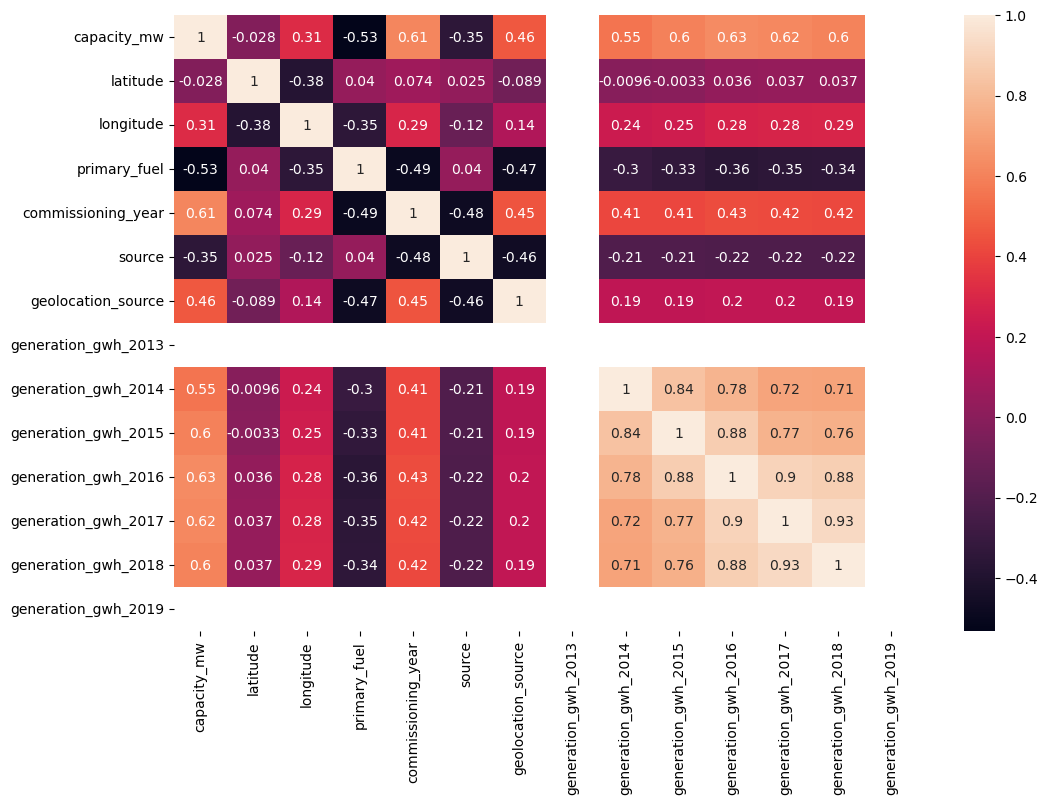

In [491]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# Machine Learning Model Building

In [492]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# Prediction of capacity_mw

In [493]:
x=df.iloc[:,1:14]
y=df.iloc[:,0]

In [494]:
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,3.373617,73.2407,6,2011.0,4.700480,1,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
1,3.249067,74.6090,1,59.2,5.164786,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
2,3.131303,69.3732,7,59.2,3.091042,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
3,3.213711,91.3602,2,2004.0,3.135494,2,59.2,6.427765,6.739037,6.787850,6.499448,6.441328,59.2
4,3.133767,82.4091,1,2015.0,3.135494,2,59.2,8.018477,8.685647,8.739376,8.591666,8.892886,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.850412,77.3568,1,2016.0,3.135494,2,59.2,4.097672,0.690581,5.457868,6.764347,6.533062,59.2
903,2.631400,78.1654,6,59.2,4.356709,0,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
904,2.789679,75.5811,7,59.2,3.091042,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
905,3.232779,73.7477,1,59.2,4.094345,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2


In [495]:
y

0      1.252763
1      4.595120
2      3.693867
3      4.912655
4      7.496097
         ...   
902    7.378384
903    1.386294
904    3.277145
905    4.394449
906    2.862201
Name: capacity_mw, Length: 870, dtype: float64

In [496]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(696, 13)
(696,)
(174, 13)
(174,)


# Using Linear Regression

In [497]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [498]:
lr.coef_

array([-3.86246285e-02,  9.44175271e-03, -1.42543461e-01,  3.91118301e-04,
       -1.82738827e-01,  3.77557980e-01, -2.77555756e-17, -5.25438695e-03,
        1.65553636e-01,  1.97778627e-01,  6.69773500e-02,  1.66210139e-02,
        0.00000000e+00])

In [499]:
lr.intercept_

1.3709070327729393

In [500]:
lrpred=lr.predict(x_test)
print("Predicted Value", lrpred)
print("Actual Value", y_test)

Predicted Value [2.12602334 2.79704471 4.3042982  2.98765052 5.99816123 4.33235244
 6.43163169 3.02017453 3.50262764 5.15985359 3.00333063 2.33274386
 4.1197326  4.91018128 3.02647301 5.06985304 2.05079303 4.55317638
 5.6983897  6.84921843 5.60519344 5.66172433 5.47945867 3.69973466
 4.09823085 3.65361413 3.50280122 3.01141303 5.99496461 6.50897641
 3.04105319 4.64542883 3.63889315 5.98891824 5.45600888 5.09152257
 4.473997   3.65292104 5.8897981  3.04424318 3.03101567 3.35594559
 2.12916291 2.02324645 1.99888108 1.96942542 2.93895565 6.47333462
 5.17352345 5.14003029 5.46627015 6.71891473 5.21314428 2.9410056
 3.64746786 6.3353936  6.44089698 4.61111693 5.94566019 4.83830396
 3.66713175 4.2998023  3.78814598 4.83773718 2.01408388 6.09775979
 4.2986908  4.58764505 5.25055062 4.5157488  3.71388763 4.11700453
 2.98962548 4.65235921 6.27307782 2.93830707 2.13286606 4.91730704
 5.61450375 3.62401508 6.73160653 4.95695131 4.30850063 4.31240089
 2.99002429 6.48257598 6.0263326  5.91998363 6.

In [501]:
print('Mean Squared Error:', mse(y_test, lrpred))
print('Mean Absolute Error:', mae(y_test, lrpred))
print('Root Mean Squared Error:', np.sqrt(mse(y_test, lrpred)))
print('R2 Score:', r2_score(y_test, lrpred))

Mean Squared Error: 1.3149594473170925
Mean Absolute Error: 0.8729118642824266
Root Mean Squared Error: 1.1467168121716418
R2 Score: 0.6385816510989709


# Random Forest Regressor

In [502]:
rfc=RandomForestRegressor()

In [503]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [504]:
pred=rfc.predict(x_test)

In [505]:
print('Mean Squared Error:', mse(y_test, pred))
print('Mean Absolute Error:', mae(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mse(y_test, pred)))
print('R2 Score:', r2_score(y_test, pred))

Mean Squared Error: 0.5468112841892114
Mean Absolute Error: 0.5411366023204116
Root Mean Squared Error: 0.73946689188172
R2 Score: 0.8497081929824261


# Saving Model

In [528]:
import joblib
joblib.dump(rfc,'global_capacity.obj')

['global_capacity.obj']

# Prediction of primary_fuel

In [507]:
X=df.drop(['primary_fuel'], axis =1)
Y=df['primary_fuel']

In [508]:
X

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,1.252763,3.373617,73.2407,2011.0,4.700480,1,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
1,4.595120,3.249067,74.6090,59.2,5.164786,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
2,3.693867,3.131303,69.3732,59.2,3.091042,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
3,4.912655,3.213711,91.3602,2004.0,3.135494,2,59.2,6.427765,6.739037,6.787850,6.499448,6.441328,59.2
4,7.496097,3.133767,82.4091,2015.0,3.135494,2,59.2,8.018477,8.685647,8.739376,8.591666,8.892886,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,7.378384,2.850412,77.3568,2016.0,3.135494,2,59.2,4.097672,0.690581,5.457868,6.764347,6.533062,59.2
903,1.386294,2.631400,78.1654,59.2,4.356709,0,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
904,3.277145,2.789679,75.5811,59.2,3.091042,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
905,4.394449,3.232779,73.7477,59.2,4.094345,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2


In [509]:
Y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 870, dtype: int32

In [510]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=42, test_size=.30)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(609, 13)
(609,)
(261, 13)
(261,)


# Using Logistic Regression

In [512]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [514]:
LRpred=LR.predict(X_test)
LRpred

array([6, 7, 3, 6, 3, 3, 1, 6, 6, 1, 6, 6, 3, 1, 6, 3, 6, 3, 1, 1, 1, 3,
       3, 6, 3, 6, 6, 6, 3, 3, 6, 3, 6, 1, 1, 3, 1, 6, 3, 6, 6, 6, 6, 3,
       6, 6, 7, 1, 3, 1, 1, 1, 1, 6, 6, 3, 1, 1, 3, 3, 3, 3, 6, 3, 6, 3,
       3, 3, 3, 3, 6, 3, 6, 3, 1, 7, 6, 3, 1, 6, 1, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 6, 3, 1, 6, 3, 3, 6, 1, 1, 3, 3, 6, 1, 3, 3, 6, 3, 3, 6,
       1, 3, 3, 6, 6, 6, 1, 1, 3, 1, 1, 3, 6, 6, 3, 6, 6, 6, 6, 6, 7, 6,
       3, 6, 6, 6, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 6, 3, 1, 6, 1, 6, 6,
       3, 1, 6, 3, 3, 3, 6, 3, 7, 6, 1, 1, 3, 6, 6, 3, 6, 1, 6, 6, 3, 3,
       3, 3, 6, 1, 3, 6, 6, 3, 1, 3, 1, 1, 3, 6, 3, 3, 6, 1, 3, 6, 3, 6,
       6, 3, 3, 3, 6, 6, 6, 1, 3, 6, 3, 3, 6, 6, 1, 3, 3, 6, 3, 6, 3, 3,
       3, 3, 6, 3, 3, 3, 6, 3, 3, 6, 6, 3, 6, 6, 1, 6, 6, 1, 3, 1, 6, 1,
       6, 3, 3, 3, 3, 1, 1, 3, 6, 1, 6, 6, 1, 1, 3, 1, 3, 3, 3])

In [515]:
accuracy_score(Y_test,LRpred)

0.45977011494252873

In [516]:
confusion_matrix(Y_test,LRpred)

array([[ 0,  0,  0,  0,  0,  0,  9,  0],
       [ 0, 33,  0, 27,  0,  0, 19,  0],
       [ 0,  5,  0, 14,  0,  0,  2,  0],
       [ 0, 17,  0, 60,  0,  0,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  4,  0],
       [ 0,  0,  0,  1,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  5]], dtype=int64)

In [517]:
print(classification_report(Y_test,LRpred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.57      0.42      0.48        79
           2       0.00      0.00      0.00        21
           3       0.56      0.78      0.65        77
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9
           6       0.24      0.96      0.39        23
           7       1.00      0.13      0.23        39

    accuracy                           0.46       261
   macro avg       0.30      0.29      0.22       261
weighted avg       0.51      0.46      0.41       261



Acurracy using Logistic Regression is 45.97

# Using Decision Tree Classifier

In [518]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [519]:
DTCpred=DTC.predict(X_test)
DTCpred

array([6, 7, 1, 7, 3, 3, 1, 7, 1, 3, 7, 6, 1, 3, 2, 3, 6, 3, 2, 1, 2, 3,
       2, 0, 3, 1, 1, 7, 1, 1, 7, 3, 0, 1, 1, 3, 3, 0, 3, 7, 7, 0, 6, 5,
       6, 6, 7, 1, 3, 3, 3, 4, 2, 7, 1, 1, 1, 3, 4, 3, 3, 3, 0, 3, 6, 4,
       3, 3, 2, 3, 1, 3, 7, 1, 3, 7, 6, 3, 1, 2, 1, 3, 3, 3, 2, 1, 1, 1,
       4, 3, 1, 6, 4, 3, 1, 3, 5, 7, 2, 1, 3, 3, 6, 1, 3, 3, 2, 3, 3, 7,
       1, 5, 2, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0, 5, 5, 6, 5, 6, 6, 1, 7, 7,
       1, 6, 0, 7, 3, 3, 1, 5, 6, 1, 4, 1, 3, 1, 4, 6, 3, 3, 7, 1, 6, 6,
       3, 1, 1, 2, 5, 1, 6, 3, 7, 7, 1, 3, 1, 7, 0, 2, 0, 1, 7, 6, 2, 3,
       1, 3, 6, 1, 2, 7, 2, 3, 3, 2, 1, 1, 3, 6, 5, 1, 7, 1, 1, 6, 3, 7,
       7, 3, 3, 3, 7, 7, 7, 3, 1, 7, 3, 3, 1, 7, 3, 3, 3, 7, 3, 1, 1, 2,
       3, 5, 0, 3, 2, 3, 1, 3, 3, 0, 0, 2, 7, 0, 3, 7, 7, 1, 3, 4, 7, 1,
       7, 2, 3, 3, 3, 1, 1, 4, 7, 1, 7, 7, 3, 1, 3, 4, 3, 3, 3])

In [520]:
accuracy_score(Y_test,DTCpred)

0.7547892720306514

In [521]:
confusion_matrix(Y_test,DTCpred)

array([[ 8,  1,  0,  0,  0,  0,  0,  0],
       [ 5, 49,  6,  7,  9,  2,  0,  1],
       [ 1,  5,  7,  6,  0,  2,  0,  0],
       [ 0,  7,  5, 65,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  1,  1,  0,  0],
       [ 1,  0,  3,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

In [522]:
print(classification_report(Y_test,DTCpred))

              precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       0.77      0.62      0.69        79
           2       0.33      0.33      0.33        21
           3       0.83      0.84      0.84        77
           4       0.10      0.25      0.14         4
           5       0.50      0.56      0.53         9
           6       1.00      1.00      1.00        23
           7       0.97      1.00      0.99        39

    accuracy                           0.75       261
   macro avg       0.63      0.69      0.65       261
weighted avg       0.78      0.75      0.76       261



Acurracy using Decision Tree Classifier is 75.47

# Using Random Forest Classifier

In [523]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [524]:
RFCpred=RFC.predict(X_test)
RFCpred

array([6, 7, 1, 7, 3, 3, 1, 7, 1, 3, 7, 6, 1, 3, 5, 3, 6, 1, 2, 1, 3, 3,
       2, 0, 3, 1, 1, 7, 3, 1, 7, 3, 0, 1, 3, 3, 3, 0, 1, 7, 7, 2, 6, 5,
       6, 6, 7, 1, 3, 3, 3, 1, 3, 7, 1, 1, 1, 3, 2, 3, 3, 3, 0, 3, 6, 1,
       3, 3, 3, 3, 1, 3, 7, 1, 3, 7, 6, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1, 1,
       1, 1, 1, 6, 1, 3, 1, 3, 5, 7, 3, 1, 3, 3, 6, 1, 3, 3, 2, 3, 1, 7,
       1, 1, 2, 1, 1, 0, 1, 1, 3, 3, 1, 3, 2, 1, 5, 6, 0, 6, 6, 1, 7, 7,
       1, 6, 1, 7, 3, 3, 1, 2, 6, 1, 1, 1, 3, 1, 1, 6, 3, 3, 7, 1, 6, 6,
       3, 1, 1, 1, 2, 1, 6, 3, 7, 7, 1, 1, 1, 7, 0, 2, 0, 1, 7, 6, 2, 3,
       1, 3, 6, 1, 1, 7, 2, 3, 3, 2, 1, 1, 3, 6, 5, 1, 7, 1, 1, 6, 3, 7,
       7, 3, 3, 3, 7, 7, 7, 1, 1, 7, 3, 3, 1, 7, 3, 3, 3, 7, 3, 0, 1, 3,
       3, 5, 0, 3, 2, 3, 1, 3, 3, 1, 0, 2, 7, 0, 3, 7, 7, 3, 3, 1, 7, 1,
       7, 3, 3, 3, 3, 1, 1, 1, 7, 1, 7, 7, 3, 1, 3, 1, 3, 3, 3])

In [525]:
accuracy_score(Y_test,RFCpred)

0.8544061302681992

In [526]:
confusion_matrix(Y_test,RFCpred)

array([[ 9,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 67,  3,  5,  0,  0,  0,  1],
       [ 0,  6,  8,  6,  0,  1,  0,  0],
       [ 0,  3,  1, 73,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  4,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

In [527]:
print(classification_report(Y_test,RFCpred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.84      0.85      0.84        79
           2       0.50      0.38      0.43        21
           3       0.87      0.95      0.91        77
           4       0.00      0.00      0.00         4
           5       0.67      0.44      0.53         9
           6       1.00      1.00      1.00        23
           7       0.97      1.00      0.99        39

    accuracy                           0.85       261
   macro avg       0.70      0.70      0.69       261
weighted avg       0.83      0.85      0.84       261



Acurracy using Random Forest Classifier is 85.44

# Saving Model

In [529]:
import joblib
joblib.dump(RFC,'global_primary.obj')

['global_primary.obj']